In [1]:
import gym
import numpy as np
import random

In [2]:
env = gym.make('Taxi-v2')
#Initialize Q table with all zeros

# Set learning parameters
LEARNING_RATE = .1
GAMMA = .95
EPSILON = 0.05

EPISODES = 10000
STEPS = 100


Q = np.zeros([env.observation_space.n,env.action_space.n])


In [3]:
def epsilon_greedy_policy(state):
    if random.uniform(0,1) < EPSILON:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

explore_total_rewards = []

for i in range(EPISODES):
    
    state = env.reset()
    
    episode_reward = 0
    
    for _ in range(STEPS):
        
        action = epsilon_greedy_policy(state)
        
        new_state, reward, done, info = env.step(action)
        
        Q[state, action] = Q[state,action] + LEARNING_RATE*(reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])
        
        state = new_state
        
        episode_reward += reward
        
        if done:
            break
    
    if i % 10 == 0:
        explore_total_rewards.append(episode_reward)

In [4]:
print Q

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.77065986e+01  9.73263066e+01  6.35525967e+01  1.12632108e+02
   2.73296702e+02  1.31771211e+02]
 [ 5.97868116e+01  1.17391138e+02  1.67481747e+02  1.31963830e+02
   3.04983631e+02  1.78670861e+02]
 ...
 [-9.77797391e-01  1.61473453e+01 -9.77797391e-01 -1.07215085e+00
  -1.00000000e+00 -2.80394660e+00]
 [-2.53159808e+00 -2.51405322e+00  3.09500770e+00  1.39183951e+02
  -2.98502500e+00 -2.98502500e+00]
 [-1.99500000e-01 -1.99500000e-01 -1.99500000e-01  3.38046073e+02
  -1.00000000e+00 -1.00000000e+00]]


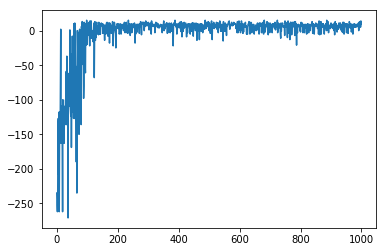

In [5]:
import matplotlib.pyplot as plt

plt.plot(explore_total_rewards)

plt.show()

In [6]:
exploit_total_rewards = []
for i in range(EPISODES):
    state = env.reset()
    episode_reward = 0
    for _ in range(STEPS):
        action = np.argmax(Q[state, :])
        
        new_state, reward, done, info = env.step(action)
        
        state = new_state
        episode_reward += reward
        
        if done:
            break
    if i % 10 == 0:    
        exploit_total_rewards.append(episode_reward)

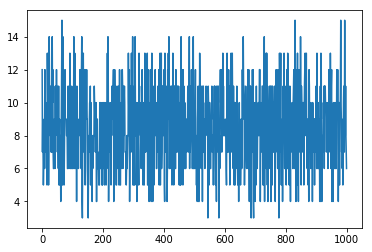

In [7]:
plt.plot(exploit_total_rewards)

plt.show()